In [50]:
import pandas as pd
from matplotlib import pyplot as plt
pdf = pd.read_csv("data/preprocessed_playlists.csv",index_col=False)
tdf=pd.read_csv("data/preprocessed_tracks.csv")
pdf.head()

,name,collaborative,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
0,Throwbacks,False,0,1493424000,52,47,1,6,11532414,37
1,Awesome Playlist,False,1,1506556800,39,23,1,5,11656470,21
2,korean,False,2,1505692800,64,51,1,18,14039958,31
3,mat,False,3,1501027200,126,107,1,4,28926058,86
4,90s,False,4,1401667200,17,16,2,7,4335282,16


In [10]:
pdf.describe()

,pid,modified_at,num_tracks,num_albums,num_followers,num_edits,duration_ms,num_artists
count,1000.000000,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000
mean,499.500000,1.476247e+09,67.50300,50.526000,2.583000,17.546000,1.574061e+07,38.746000
std,288.819436,3.719567e+07,55.00334,41.448997,32.813501,20.978751,1.290575e+07,31.245091
min,0.000000,1.322611e+09,5.00000,2.000000,1.000000,2.000000,1.002971e+06,3.000000
25%,249.750000,1.459944e+09,25.00000,19.000000,1.000000,4.000000,5.810390e+06,16.000000
50%,499.500000,1.491048e+09,50.00000,38.000000,1.000000,10.000000,1.163116e+07,30.000000
75%,749.250000,1.505779e+09,92.50000,70.000000,1.250000,22.000000,2.181915e+07,53.000000
max,999.000000,1.509494e+09,245.00000,225.000000,1038.000000,178.000000,5.781713e+07,175.000000


In [12]:
pdf=pdf[pdf['num_followers']<1038]

In [11]:
tdf.describe()

,pos,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,artist_pop,track_pop
count,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000,34247.000000
mean,56.640056,0.584693,0.636613,5.214209,-7.606617,0.665080,0.091165,0.263740,0.077185,0.197244,0.486016,121.703229,61.916606,31.114959
std,49.088235,0.164307,0.225477,3.583579,3.967167,0.471969,0.101096,0.300548,0.218725,0.166794,0.243630,29.296913,19.120147,25.468451
min,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.476000,0.490000,2.000000,-9.165500,0.000000,0.035100,0.020100,0.000000,0.095800,0.292000,98.623000,51.000000,0.000000
50%,42.000000,0.592000,0.669000,5.000000,-6.695000,1.000000,0.048900,0.126000,0.000008,0.128000,0.477000,120.930000,65.000000,34.000000
75%,84.000000,0.705000,0.818000,8.000000,-5.002000,1.000000,0.095800,0.445000,0.002700,0.252000,0.677000,140.032000,76.000000,53.000000
max,244.000000,0.988000,1.000000,11.000000,2.766000,1.000000,0.962000,0.996000,0.995000,1.000000,0.998000,219.297000,100.000000,97.000000


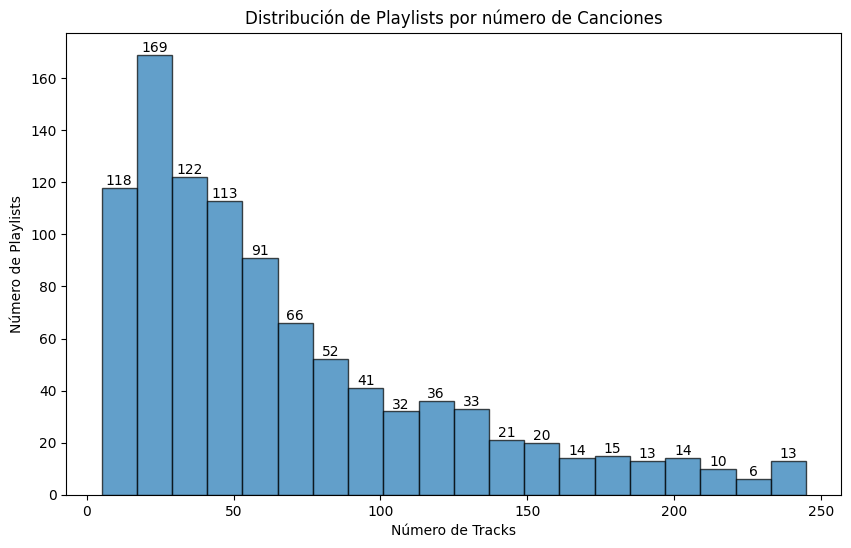

In [47]:

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(pdf['num_tracks'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Número de Tracks')
plt.ylabel('Número de Playlists')
plt.title('Distribución de Playlists por número de Canciones')


for count, rect in zip(n, patches):
    plt.text(rect.get_x() + rect.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.grid(False)
plt.show()

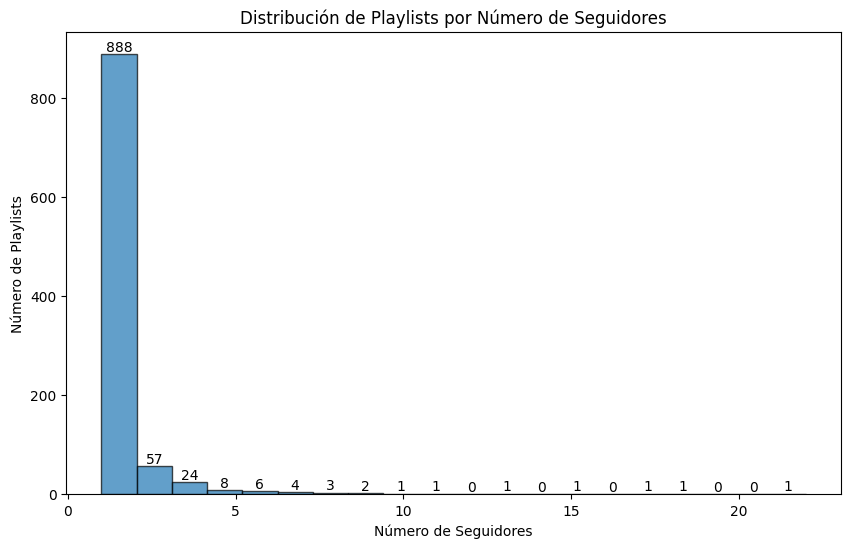

In [26]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(pdf['num_followers'], bins=20, edgecolor='k', alpha=0.7)
plt.xlabel('Número de Seguidores')
plt.ylabel('Número de Playlists')
plt.title('Distribución de Playlists por Número de Seguidores')
for count, rect in zip(n, patches):
    plt.text(rect.get_x() + rect.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.grid(False)
plt.show()

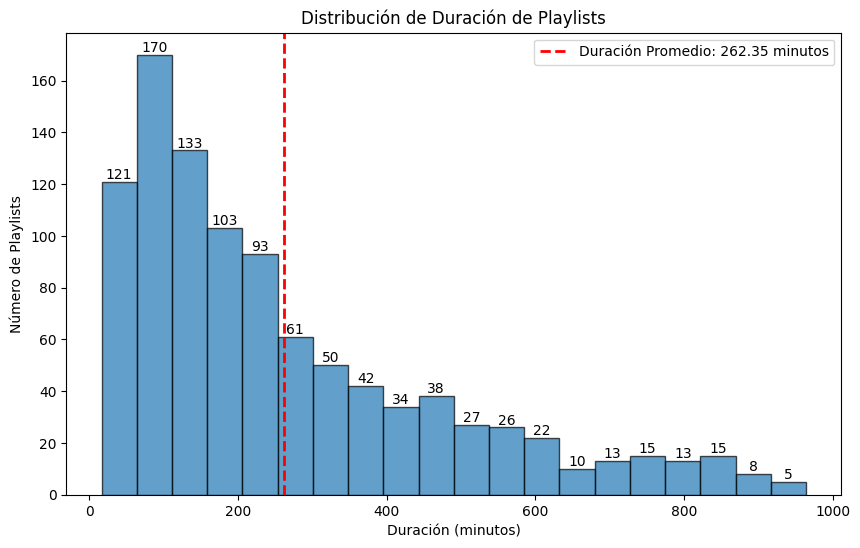

In [23]:
pdf['duration_minutes'] = pdf['duration_ms'] / 60000
average_duration = pdf['duration_minutes'].mean()
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(pdf['duration_minutes'], bins=20, edgecolor='k', alpha=0.7)
plt.axvline(average_duration, color='red', linestyle='dashed', linewidth=2, label=f'Duración Promedio: {average_duration:.2f} minutos')
plt.xlabel('Duración (minutos)')
plt.ylabel('Número de Playlists')
plt.title('Distribución de Duración de Playlists')
for count, rect in zip(n, patches):
    plt.text(rect.get_x() + rect.get_width() / 2, count, str(int(count)), ha='center', va='bottom')

plt.legend()
plt.grid(False)
plt.show()

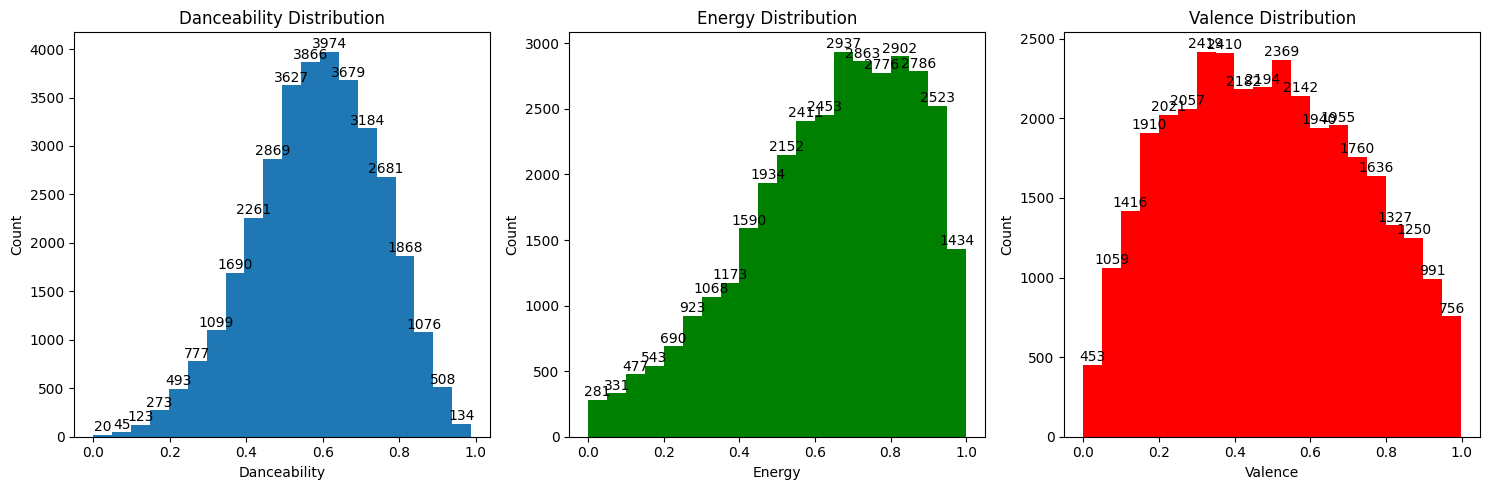

In [40]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].hist(tdf['danceability'], bins=20, color='blue', alpha=0.7)
axs[0].set_title('Danceability Distribution')
axs[0].set_xlabel('Danceability')
axs[0].set_ylabel('Count')

axs[1].hist(tdf['energy'], bins=20, color='green', alpha=0.7)
axs[1].set_title('Energy Distribution')
axs[1].set_xlabel('Energy')
axs[1].set_ylabel('Count')

axs[2].hist(tdf['valence'], bins=20, color='red', alpha=0.7)
axs[2].set_title('Valence Distribution')
axs[2].set_xlabel('Valence')
axs[2].set_ylabel('Count')

for bin_value, count in zip(axs[0].patches, axs[0].hist(tdf['danceability'], bins=20)[0]):
    axs[0].text(bin_value.get_x() + bin_value.get_width() / 2,
            count + 5,  # Ajustar la posición vertical
            str(int(count)),  # Formatear el valor como entero
            ha='center', va='bottom')
for bin_value, count in zip(axs[1].patches, axs[1].hist(tdf['energy'], bins=20,color='green')[0]):
    axs[1].text(bin_value.get_x() + bin_value.get_width() / 2,
            count + 5,  # Ajustar la posición vertical
            str(int(count)),  # Formatear el valor como entero
            ha='center', va='bottom')
for bin_value, count in zip(axs[2].patches, axs[2].hist(tdf['valence'], bins=20,color='red')[0]):
    axs[2].text(bin_value.get_x() + bin_value.get_width() / 2,
            count + 5,  # Ajustar la posición vertical
            str(int(count)),  # Formatear el valor como entero
            ha='center', va='bottom')
plt.tight_layout()
plt.show()

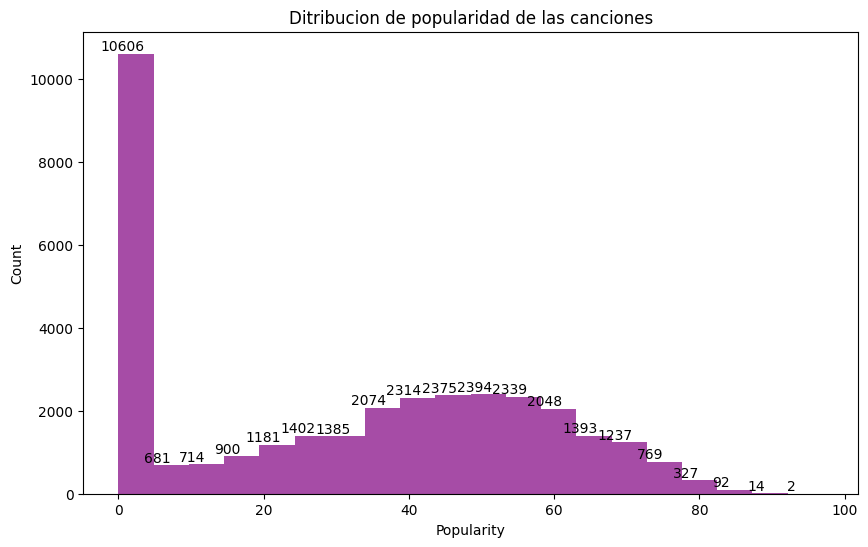

In [45]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(tdf['track_pop'], bins=20, color='purple', alpha=0.7)
plt.title('Ditribucion de popularidad de las canciones')
plt.xlabel('Popularity')
plt.ylabel('Count')
for count, bin_value in zip(n, bins):
    plt.text(bin_value + 0.5, count + 5, str(int(count)), ha='center', va='bottom')
plt.show()

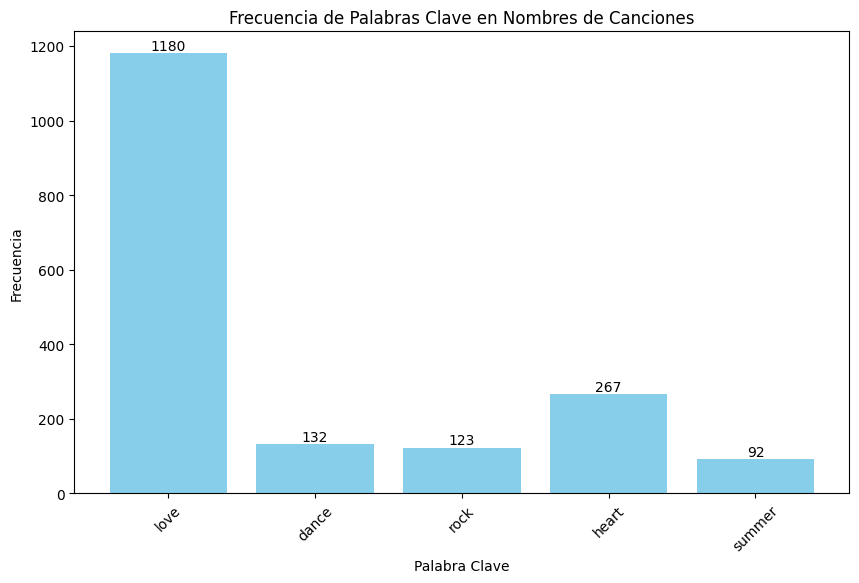

In [51]:
import re
tdf['track_name'] = tdf['track_name'].str.lower()
tdf['track_name'] = tdf['track_name'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
tdf['track_name'] = tdf['track_name'].str.split()
palabras_clave = ['love', 'dance', 'rock', 'heart', 'summer']
frecuencias = [tdf['track_name'].apply(lambda x: x.count(palabra)).sum() for palabra in palabras_clave]
plt.figure(figsize=(10, 6))
plt.bar(palabras_clave, frecuencias, color='skyblue')
plt.title('Frecuencia de Palabras Clave en Nombres de Canciones')
plt.xlabel('Palabra Clave')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
for i, valor in enumerate(frecuencias):
    plt.text(i, valor, str(valor), ha='center', va='bottom')
plt.show()

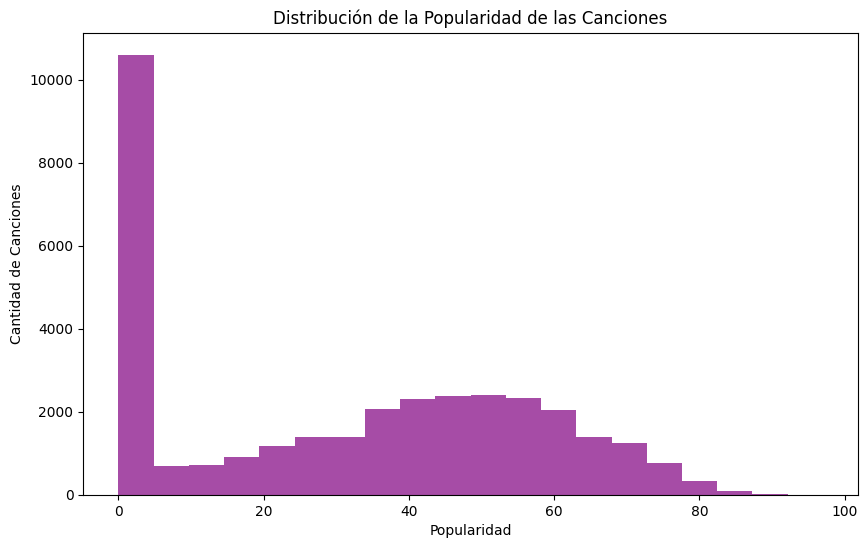

In [46]:
plt.figure(figsize=(10, 6))
plt.hist(tdf['track_pop'], bins=20, color='purple', alpha=0.7)
plt.title('Distribución de la Popularidad de las Canciones')
plt.xlabel('Popularidad')
plt.ylabel('Cantidad de Canciones')
plt.show()